In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

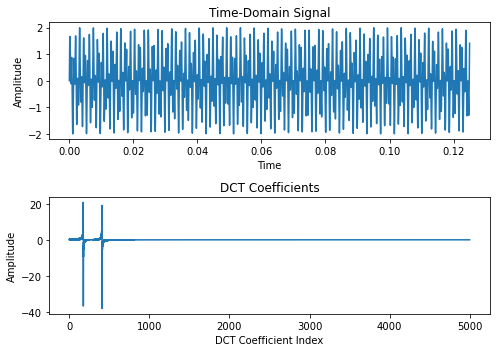

In [2]:
# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

plt.figure(figsize=(7, 5))

# First subplot - Time-domain signal
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal')

# Second subplot - DCT coefficients
plt.subplot(2, 1, 2)
plt.plot(yt)
plt.xlabel('DCT Coefficient Index')
plt.ylabel('Amplitude')
plt.title('DCT Coefficients')

# Adjust layout and display the combined figure with subplots
plt.tight_layout()
plt.show()

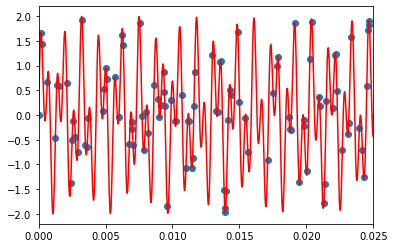

In [3]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

plt.figure()
plt.plot(t, y, color='red')
plt.scatter(t2, y2)
plt.xlim(0, 0.025)
plt.show()

In [ ]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Aug 30 10:15:08 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) Aug 30 10:15:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 30 10:15:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 30 10:15:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 30 10:15:08 PM: Compiling problem (target solver=ECOS).
(CVXPY) Aug 30 10:15:08 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

/Users/stasik/miniforge3/envs/CSTR/lib/python3.9/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Aug 30 10:15:09 PM: Applying reduction ECOS
(CVXPY) Aug 30 10:15:09 PM: Finished problem compilation (took 1.163e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Aug 30 10:15:09 PM: Invoking solver ECOS  to obtain a solution.


In [ ]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

plt.figure()
plt.plot(t, y)
plt.plot(t, sig)
plt.xlim(0, 0.025)
plt.show()